In [1]:
import numpy as np
from Bresenheim import *
import cpm
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
dimension = 128
cube = test(dimension,plotly=False,mayavi=False)

percentage of volume occupied by frc 17.943614721298218


In [3]:
# ### SET UP CPM ###
# # params : 
# dimension = 256
# number_of_types = 3
# temperature = 7
# # emmpty cube for now : 
# # cube = np.zeros((dimension,dimension,dimension))
# # cube_with_type = np.copy(cube.astype(np.uint32))
# # cube_with_type[cube==1] += 2**24
# # initialize : 
# simulation = cpm.Cpm(dimension, number_of_types, temperature)
# simulation.set_constraints(cell_type = 1,other_cell_type = 2,adhesion = 5*10**5)
# simulation.set_constraints(cell_type = 2,target_area = 15000, lambda_area=5*10**5)
# simulation.set_constraints(cell_type = 2,other_cell_type = 2,adhesion = 10**6)
# simulation.set_constraints(cell_type = 2,other_cell_type = 0,adhesion = 5*10**5)
# simulation.set_constraints(cell_type = 2, lambda_perimeter = 2, target_perimeter = 15)
# #simulation.initialize_from_array(cube_with_type,1)
# simulation.set_constraints(cell_type = 2, lambda_act = 30, max_act = 40) # 400,20

In [30]:
### SET UP CPM ###
# params from Inge: multiplicated the adhesion engergies by 10
# and because lambda of .1 not possible here. 
dimension = 256
number_of_types = 3
temperature = 7

# initialize : 
simulation = cpm.Cpm(dimension, number_of_types, temperature)
# FRC :
# cube_with_type = np.copy(cube.astype(np.uint32))
# cube_with_type[cube==1] += 2**24
# LAmbdas ; 
simulation.set_constraints(cell_type = 2,target_area = 1800, lambda_area=250)
simulation.set_constraints(cell_type = 2, lambda_perimeter = 10, target_perimeter = 8600)
simulation.set_constraints(cell_type = 2, lambda_act = 200, max_act = 42) # 160,40
# adhesion ; 
simulation.set_constraints(cell_type = 1,other_cell_type = 2,adhesion = 150)
simulation.set_constraints(cell_type = 2,other_cell_type = 2,adhesion = 150)
simulation.set_constraints(cell_type = 2,other_cell_type = 0,adhesion = 50)
# simulation.initialize_from_array(cube_with_type,1)


In [31]:
# calc perimeter approx
r = (1800 / (4*np.pi/3))**(1/3)
print(4*np.pi*r**2)

715.5925237294172


In [32]:
# some checks : 
s = simulation.get_state()
print(np.sum(s))
simulation.run(10)
print(np.sum(s))

0
0


In [33]:
# # show network when present :
# %gui qt
# def show_state(s):
#     mlab.clf()
#     mlab.contour3d(s)

In [34]:
# add a cell : 
simulation.add_cell(128,128,128,2)
# add frc :
#simulation.initialize_from_array(cube_with_type,1)
cellids = s % 2**24
celltypes = s // 2**24
#show_state(s)
#print(cellids)

In [35]:
#ndimage.measurements.center_of_mass(celltypes == 1)
cellids = s % 2**24
celltypes = s // 2**24
print(len(np.where(celltypes == 1)[0]))

0


In [36]:
# plt.figure(figsize=(10,10))
# plt.imshow(celltypes[64])
# plt.show()

In [37]:
simulation.run(20)
cellids = s % 2**24
celltypes = s // 2**24
print(len(np.where(celltypes == 2)[0]))

1800


In [ ]:
#show_state(s)

In [38]:
# save path of single cell over couple of simulations : 
# cell needs to be able to move : 
path = np.zeros((dimension,dimension,dimension))
act_state = simulation.get_act_state()
cell_state = simulation.get_state()
cofmass = []
# simulate 100 steps
for i in range(100):
    simulation.run(10)
    path = path + act_state
    cofmass.append(ndimage.measurements.center_of_mass(cell_state))
#show_state(path)

In [ ]:
# show_state(path)

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib notebook
# plot path of center of mass  :
x = [c[0] for c in cofmass]
y = [c[1] for c in cofmass]
z = [c[2] for c in cofmass]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x,y,z)
ax.scatter3D(x[0],y[0],z[0],label = 'start')
ax.scatter3D(x[-1],y[-1],z[-1],label = 'end')
ax.legend()

In [ ]:
x = simulation.get_act_state()
figure = plt.figure(figsize = (15,15))
plt.imshow(x[128])
s = simulation.get_state()
# figure = plt.figure(figsize = (15,15))
# plt.imshow(s[128])=0)]

In [ ]:
print(x.shape)

In [ ]:
len(np.where(path != 0.)[0])/256**3

In [19]:
# TRY placing cell at boundary ; 

dimension = 256
number_of_types = 3
temperature = 7

# initialize : 
simulation = cpm.Cpm(dimension, number_of_types, temperature)
# FRC :
# cube_with_type = np.copy(cube.astype(np.uint32))
# cube_with_type[cube==1] += 2**24
# LAmbdas ; 
simulation.set_constraints(cell_type = 2,target_area = 1800, lambda_area=250)
simulation.set_constraints(cell_type = 2, lambda_perimeter = 10, target_perimeter = 8600)
simulation.set_constraints(cell_type = 2, lambda_act = 100, max_act = 35) # 160,40
# adhesion ; 
simulation.set_constraints(cell_type = 1,other_cell_type = 2,adhesion = 150)
simulation.set_constraints(cell_type = 2,other_cell_type = 2,adhesion = 150)
simulation.set_constraints(cell_type = 2,other_cell_type = 0,adhesion = 50)
# simulation.initialize_from_array(cube_with_type,1)

simulation.add_cell(128,128,128,2)
s = simulation.get_state()
cellids = s % 2**24
celltypes = s // 2**24
print(len(np.where(celltypes == 2)[0]))
cell = celltypes[np.where(celltypes == 2)]
c_of_masses = ndimage.measurements.center_of_mass(s)
print(c_of_masses)

1
(128.0, 128.0, 128.0)


In [20]:
simulation.run(1)

In [23]:
def real_cofmass(cell):
    """ cell = simulation.get_state() % 2**24 == id """
    labels, num_features = ndimage.label(cell)
    if num_features == 1:
        return ndimage.measurements.center_of_mass(cell)
        print('1 feature')
    else:
        # take biggest blob :
        sizes = [np.count_nonzero(labels == i) for i in range(1,num_features + 1)]
        print(sizes)
        max_indeces = np.where(sizes == np.amax(sizes))[0]
        index = np.random.choice(max_indeces,1,replace = False)
        print(index)
        # set smaller patches to zero : 
        labels[labels != index+1] = 0
        print(np.unique(labels))
        print(labels.shape)
#         print(num_features,' features')
        return ndimage.measurements.center_of_mass(labels)
    
    
#     elif num_fetures =< 8
        
#     else:# num_features > 8:
#         # cell has some blobs not connected :
#         # find biggest 8 blobs : 
#         sizes = [np.count_nonzero(labels == i) for i in range(1,num_features + 1)]
#         max_indeces = np.where(sizes == max(sizes))
#         indeces = np.random.sample(max_indeces,8,replace = False)
#         labels = labels[indeces]
    
    
cell = simulation.get_state() % 2**24 == 1
c = real_cofmass(cell)
print(c)

[523, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 1]
[0]
[0 1]
(256, 256, 256)
(127.75334608030593, 128.65391969407267, 127.77629063097514)


1
[1, 5, 12, 1, 1, 1, 1]
[2]
[0 2]
(256, 256, 256)
(126.0, 127.8, 126.4)


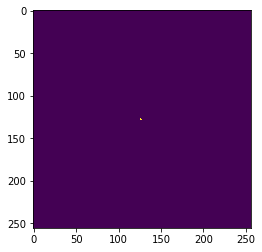

1
[1, 10, 1, 1, 1, 17, 3, 1, 1, 2]
[5]
[0 5]
(256, 256, 256)
(127.0, 126.0, 126.0)


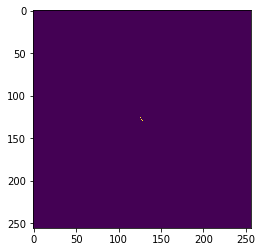

1
[1, 1, 67, 1, 1, 1, 1, 1, 1, 1]
[2]
[0 2]
(256, 256, 256)
(123.0, 127.0, 128.0)


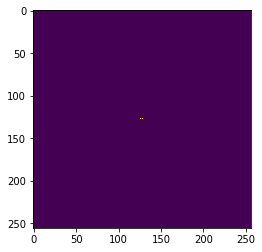

1
[1, 1, 1, 114, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1]
[3]
[0 3]
(256, 256, 256)
(123.0, 127.0, 126.0)


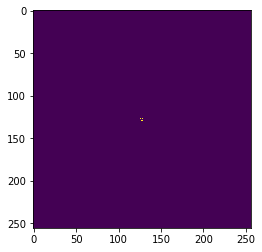

1
[1, 1, 1, 202, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3]
[0 3]
(256, 256, 256)
(122.0, 126.0, 126.0)


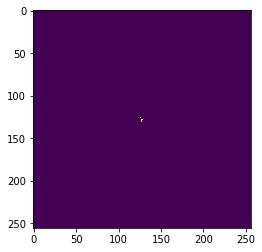

1
[1, 356, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1]
[1]
[0 1]
(256, 256, 256)
(120.0, 130.0, 129.0)


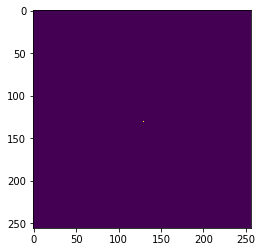

1
[523, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 1]
[0]
[0]
(256, 256, 256)
(nan, nan, nan)


ValueError: cannot convert float NaN to integer

In [22]:
# run and visualizd : 
for i in range(10):
    simulation.run(1)
#     s = simulation.get_state()
#     cellids = s % 2**24
#     celltypes = s // 2**24
    print(len(np.where(cellids == 1)[0]))
    cell = simulation.get_state() % 2**24 == 1
    c_of_masses = real_cofmass(cell)
    print(c_of_masses)
    plt.imshow(s[int(c_of_masses[0])])
    plt.show()